In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the dataset
df= pd.read_csv("C:/Users/Lenovo/Downloads/divisions daily weather.csv")
print(f'Shape of concatenated data  is: {df.shape}')

Shape of concatenated data  is: (30000, 44)


In [5]:
df.head()

,cloudcover,conditions,Year,Quarter,Month,Day,DayType,description,dew,Division,...,Month.2,Day.2,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
0,0.0,Clear,2013,Qtr 1,January,1,No rain,Clear conditions throughout the day.,50.9,Sylhet,...,January,1,60.8,73.8,47.4,6,1.6,208.4,NaN,6.0
1,0.0,Clear,2013,Qtr 1,January,2,No rain,Clear conditions throughout the day.,13.6,Chittagong,...,January,2,18.3,24.0,11.9,7,4.2,323.1,NaN,18.4
2,0.0,Clear,2013,Qtr 1,January,2,No rain,Clear conditions throughout the day.,53.0,Sylhet,...,January,2,62.9,75.6,50.8,7,1.9,203.8,NaN,7.2
3,0.0,Clear,2013,Qtr 1,January,3,No rain,Clear conditions throughout the day.,42.0,Naryanganj,...,January,3,60.9,78.9,48.5,7,2.5,10.2,NaN,9.8
4,0.0,Clear,2013,Qtr 1,January,4,No rain,Clear conditions throughout the day.,36.3,Naryanganj,...,January,4,60.1,81.8,46.3,7,2.5,12.7,NaN,8.5


In [8]:
numeric_df = df.select_dtypes(include=[np.number])
df_corr = numeric_df.corr(method='pearson')
df_corr

,cloudcover,Year,Day,dew,feelslike,feelslikemax,feelslikemin,humidity,moonphase,precip,...,Day.1,Year.2,Day.2,temp,tempmax,tempmin,uvindex,visibility,winddir,windspeed
cloudcover,1.000000,0.013168,0.000246,0.216645,0.132986,0.106617,0.165432,0.589316,0.000594,0.291231,...,0.000246,0.013168,0.000246,0.052261,-0.025524,0.142556,-0.397873,0.014989,-0.206788,0.246029
Year,0.013168,1.000000,-0.001178,-0.002794,0.012597,0.013627,0.018545,-0.083402,-0.003661,-0.013021,...,-0.001178,1.000000,-0.001178,0.012756,0.010488,0.014714,0.157986,0.476610,-0.062209,0.035917
Day,0.000246,-0.001178,1.000000,0.000870,-0.002091,-0.001448,-0.002981,0.007667,0.000595,0.001791,...,1.000000,-0.001178,1.000000,-0.001402,-0.001616,-0.001168,0.007126,0.003311,-0.013494,0.001952
dew,0.216645,-0.002794,0.000870,1.000000,0.963330,0.958669,0.962407,0.126836,-0.002774,-0.136811,...,0.000870,-0.002794,0.000870,0.946987,0.918297,0.965033,-0.014036,-0.277027,-0.169574,-0.356747
feelslike,0.132986,0.012597,-0.002091,0.963330,1.000000,0.995754,0.992884,-0.102299,-0.000007,-0.162324,...,-0.002091,0.012597,-0.002091,0.991631,0.975765,0.994000,0.101697,-0.240467,-0.147317,-0.352854
feelslikemax,0.106617,0.013627,-0.001448,0.958669,0.995754,1.000000,0.983932,-0.112324,0.000651,-0.173693,...,-0.001448,0.013627,-0.001448,0.989565,0.979425,0.987255,0.112005,-0.236669,-0.145493,-0.367926
feelslikemin,0.165432,0.018545,-0.002981,0.962407,0.992884,0.983932,1.000000,-0.079245,-0.001709,-0.149832,...,-0.002981,0.018545,-0.002981,0.984602,0.963092,0.997249,0.077063,-0.238638,-0.147089,-0.331737
humidity,0.589316,-0.083402,0.007667,0.126836,-0.102299,-0.112324,-0.079245,1.000000,-0.010274,0.253924,...,0.007667,-0.083402,0.007667,-0.179493,-0.251916,-0.091548,-0.493625,-0.129280,-0.143610,0.132669
moonphase,0.000594,-0.003661,0.000595,-0.002774,-0.000007,0.000651,-0.001709,-0.010274,1.000000,-0.008476,...,0.000595,-0.003661,0.000595,-0.000323,0.000537,-0.001629,-0.003746,-0.003813,0.001941,-0.005806
precip,0.291231,-0.013021,0.001791,-0.136811,-0.162324,-0.173693,-0.149832,0.253924,-0.008476,1.000000,...,0.001791,-0.013021,0.001791,-0.185783,-0.209840,-0.157280,-0.248549,-0.014423,-0.076232,0.307546


<Axes: xlabel='humidity', ylabel='Division'>

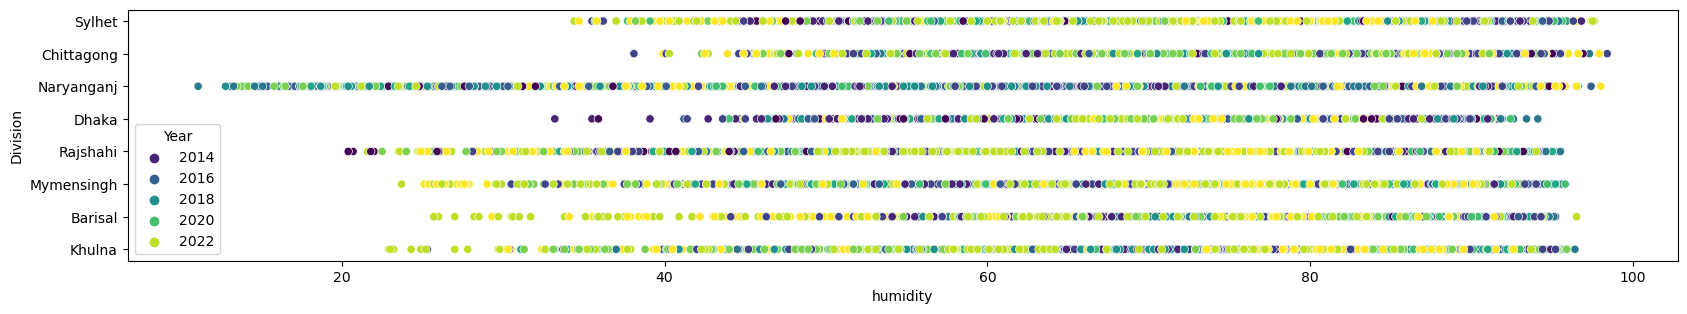

In [9]:
plt.figure(figsize = (20,15))

plt.subplot(4,1,1)
sns.scatterplot(x = 'humidity', y='Division' , hue='Year', palette='viridis', data = df)

<Axes: xlabel='humidity', ylabel='Division'>

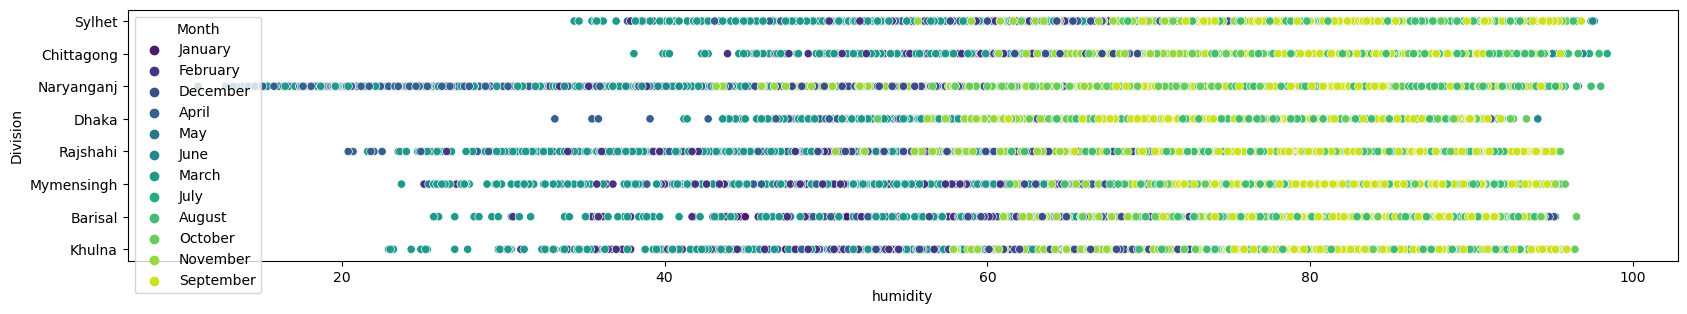

In [10]:
plt.figure(figsize = (20,15))

plt.subplot(4,1,1)
sns.scatterplot(x = 'humidity', y='Division' , hue='Month', palette='viridis', data = df)

<Axes: xlabel='sealevelpressure', ylabel='Division'>

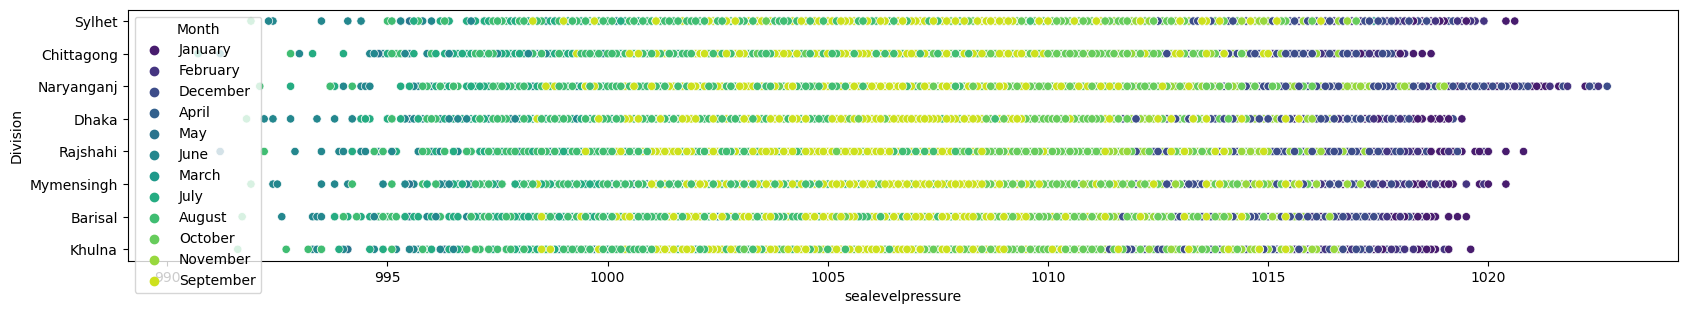

In [11]:
plt.figure(figsize = (20,15))

plt.subplot(4,1,1)
sns.scatterplot(x = 'sealevelpressure', y='Division' , hue='Month', palette='viridis', data = df)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Barisal'),
  Text(1, 0, 'Chittagong'),
  Text(2, 0, 'Dhaka'),
  Text(3, 0, 'Khulna'),
  Text(4, 0, 'Mymensingh'),
  Text(5, 0, 'Naryanganj'),
  Text(6, 0, 'Rajshahi'),
  Text(7, 0, 'Sylhet')])

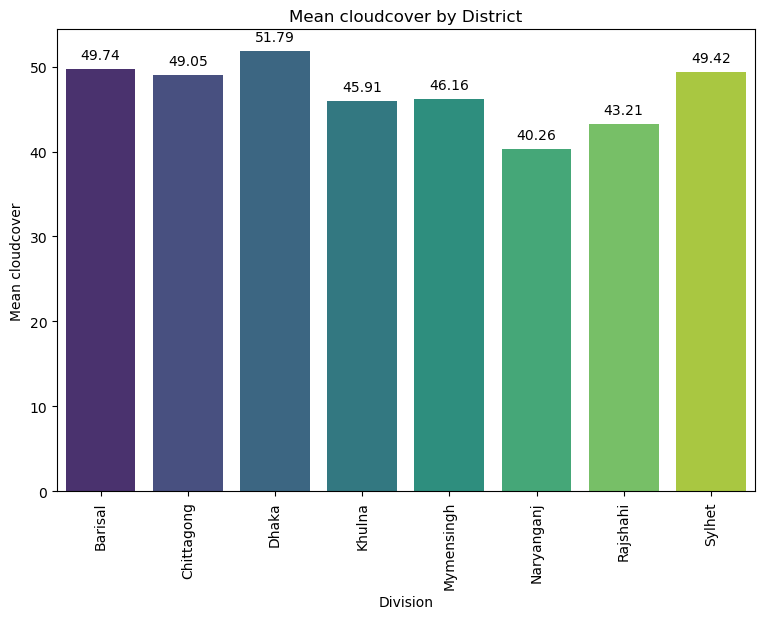

In [14]:
average_river_discharge_name = df.groupby('Division')['cloudcover'].mean().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(x='Division', y='cloudcover', data=average_river_discharge_name, palette='viridis')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title('Mean cloudcover by District')
plt.xlabel('Division')
plt.ylabel('Mean cloudcover')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Barisal'),
  Text(1, 0, 'Chittagong'),
  Text(2, 0, 'Dhaka'),
  Text(3, 0, 'Khulna'),
  Text(4, 0, 'Mymensingh'),
  Text(5, 0, 'Naryanganj'),
  Text(6, 0, 'Rajshahi'),
  Text(7, 0, 'Sylhet')])

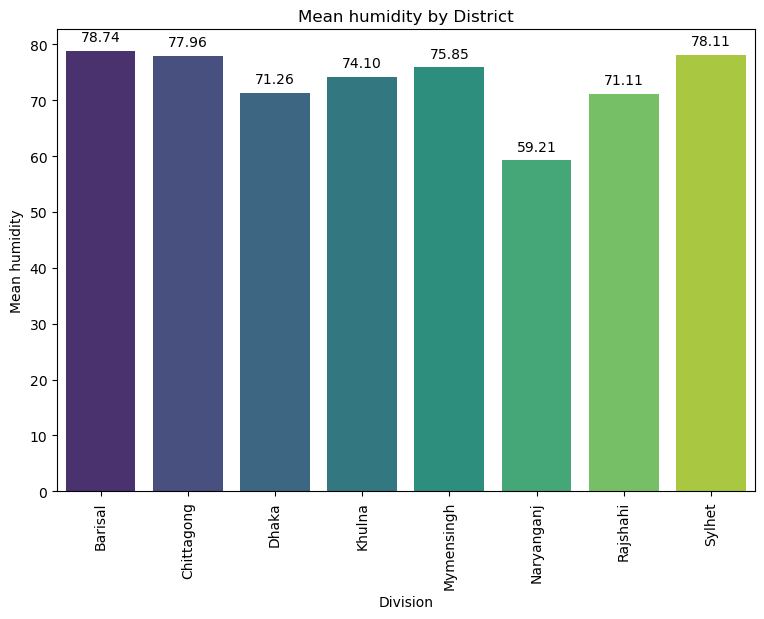

In [15]:
average_river_discharge_name = df.groupby('Division')['humidity'].mean().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(x='Division', y='humidity', data=average_river_discharge_name, palette='viridis')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title('Mean humidity by District')
plt.xlabel('Division')
plt.ylabel('Mean humidity')
plt.xticks(rotation=90)

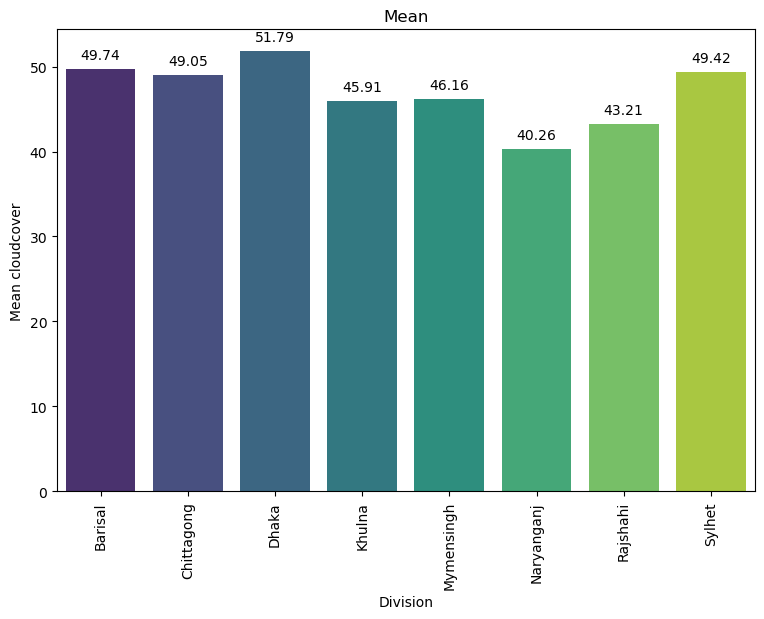

In [16]:
filtered_df = df[df['Year'] != 'Division']

average_river_discharge_name = filtered_df.groupby('Division')['cloudcover'].mean().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(x='Division', y='cloudcover', data=average_river_discharge_name, palette='viridis')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title('Mean')
plt.xlabel('Division')
plt.ylabel('Mean cloudcover')
plt.xticks(rotation=90)

plt.show()

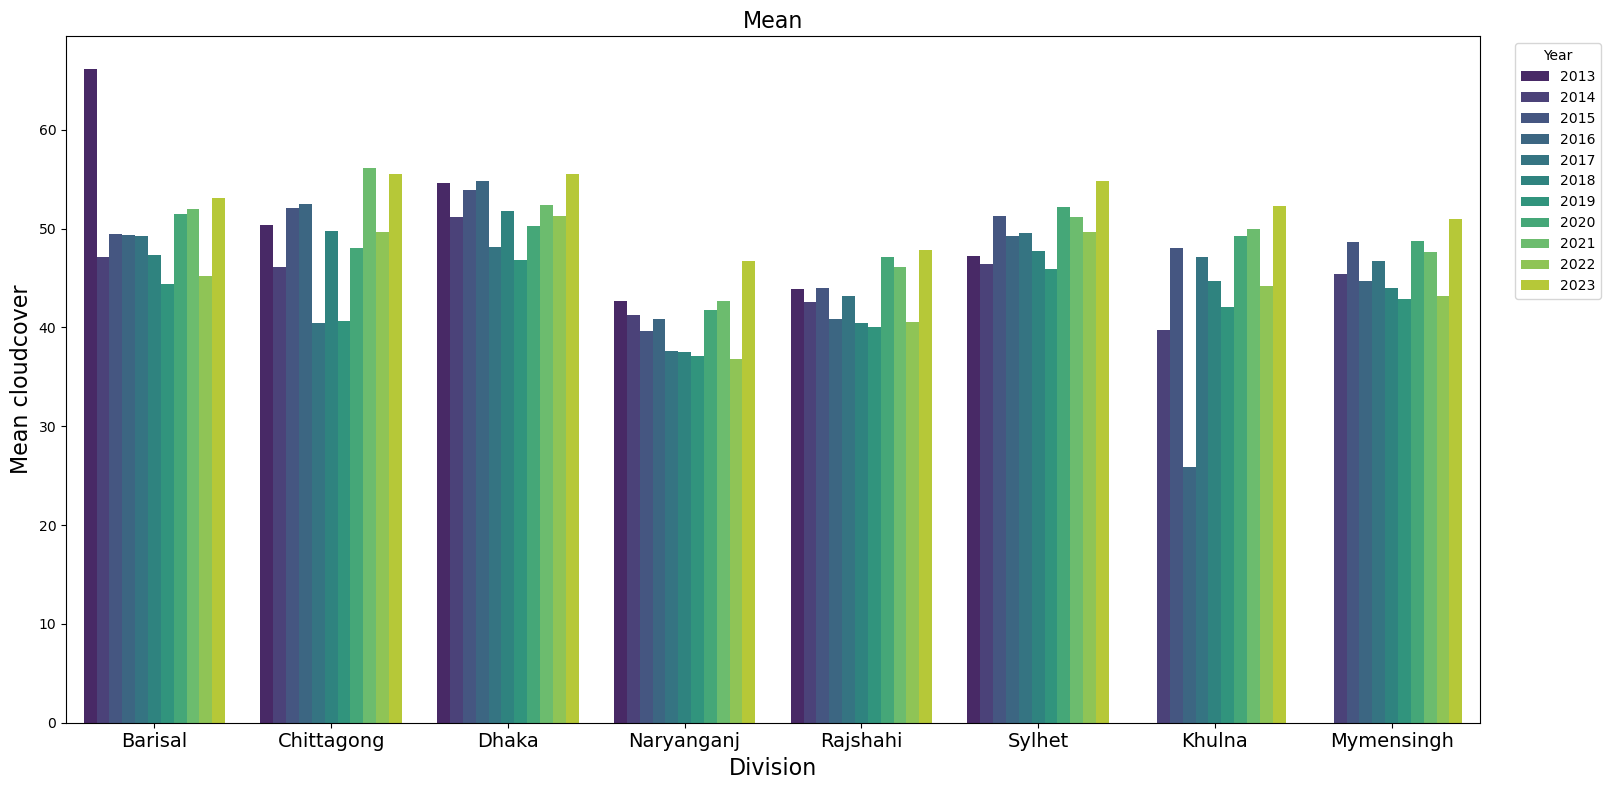

In [17]:
average_river_discharge_name_year=filtered_df.groupby(["Year", "Division"])[["cloudcover"]].aggregate('mean')
average_river_discharge_name_year = average_river_discharge_name_year.reset_index()

plt.figure(figsize=(15, 8))
sns.set_palette("viridis")

colors = sns.color_palette("viridis", n_colors=len(average_river_discharge_name_year["Year"].unique()))

sns.barplot(x="Division", y="cloudcover", hue="Year", data=average_river_discharge_name_year, palette=colors)
plt.xlabel("Division", fontsize=16)
plt.ylabel("Mean cloudcover", fontsize=16)
plt.title("Mean", fontsize=16)
#plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.legend(title="Year",  bbox_to_anchor=(1.02, 1), loc="upper left")

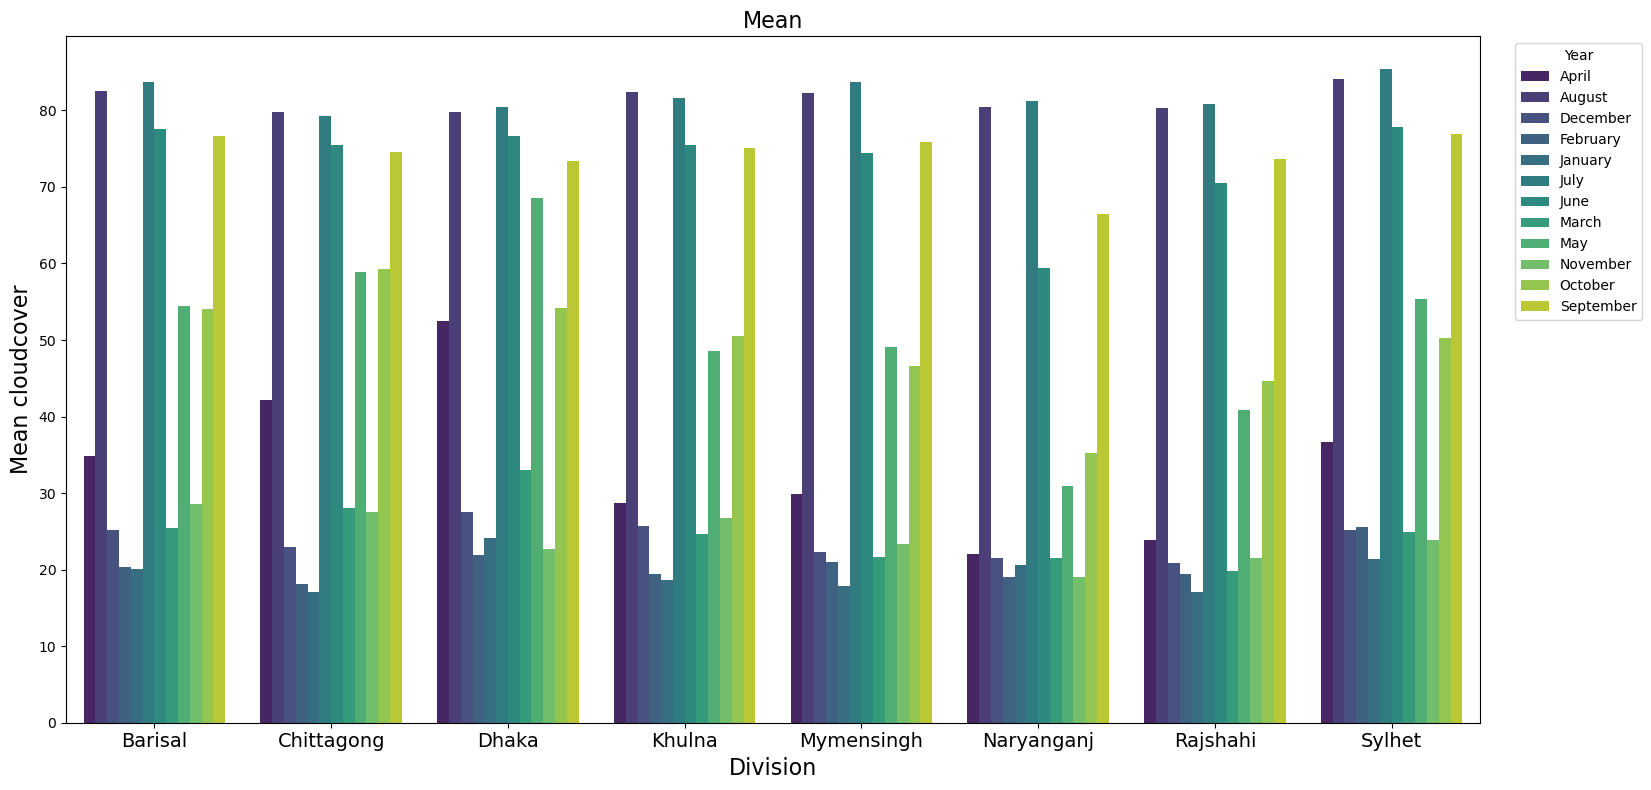

In [18]:
average_river_discharge_name_year=filtered_df.groupby(["Month", "Division"])[["cloudcover"]].aggregate('mean')
average_river_discharge_name_year = average_river_discharge_name_year.reset_index()

plt.figure(figsize=(15, 8))
sns.set_palette("viridis")

colors = sns.color_palette("viridis", n_colors=len(average_river_discharge_name_year["Month"].unique()))

sns.barplot(x="Division", y="cloudcover", hue="Month", data=average_river_discharge_name_year, palette=colors)
plt.xlabel("Division", fontsize=16)
plt.ylabel("Mean cloudcover", fontsize=16)
plt.title("Mean", fontsize=16)
#plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.legend(title="Year",  bbox_to_anchor=(1.02, 1), loc="upper left")

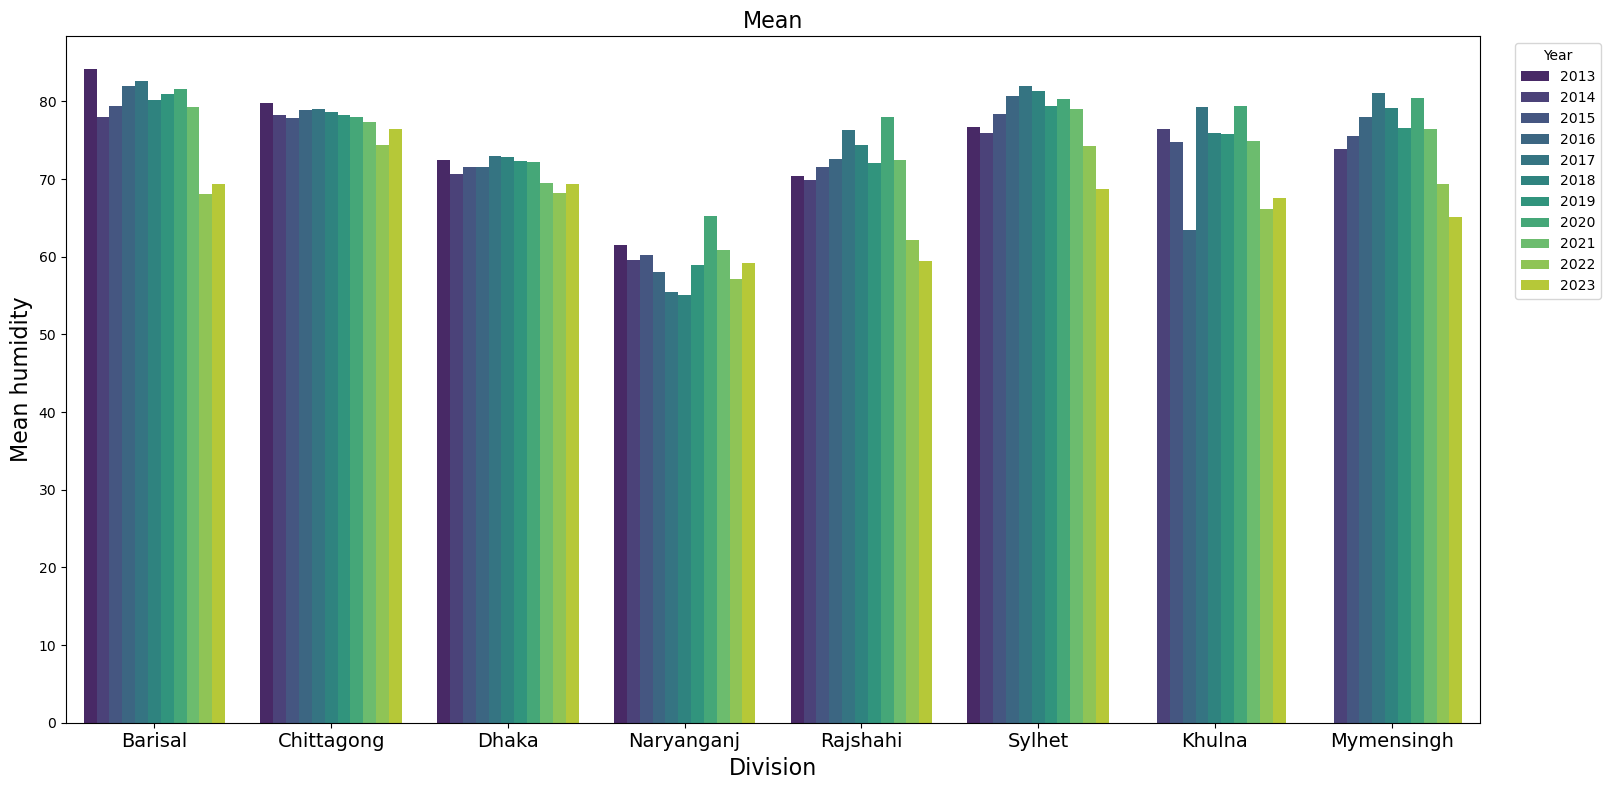

In [19]:
average_river_discharge_name_year=filtered_df.groupby(["Year", "Division"])[["humidity"]].aggregate('mean')
average_river_discharge_name_year = average_river_discharge_name_year.reset_index()

plt.figure(figsize=(15, 8))
sns.set_palette("viridis")

colors = sns.color_palette("viridis", n_colors=len(average_river_discharge_name_year["Year"].unique()))

sns.barplot(x="Division", y="humidity", hue="Year", data=average_river_discharge_name_year, palette=colors)
plt.xlabel("Division", fontsize=16)
plt.ylabel("Mean humidity", fontsize=16)
plt.title("Mean", fontsize=16)
#plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.legend(title="Year",  bbox_to_anchor=(1.02, 1), loc="upper left")

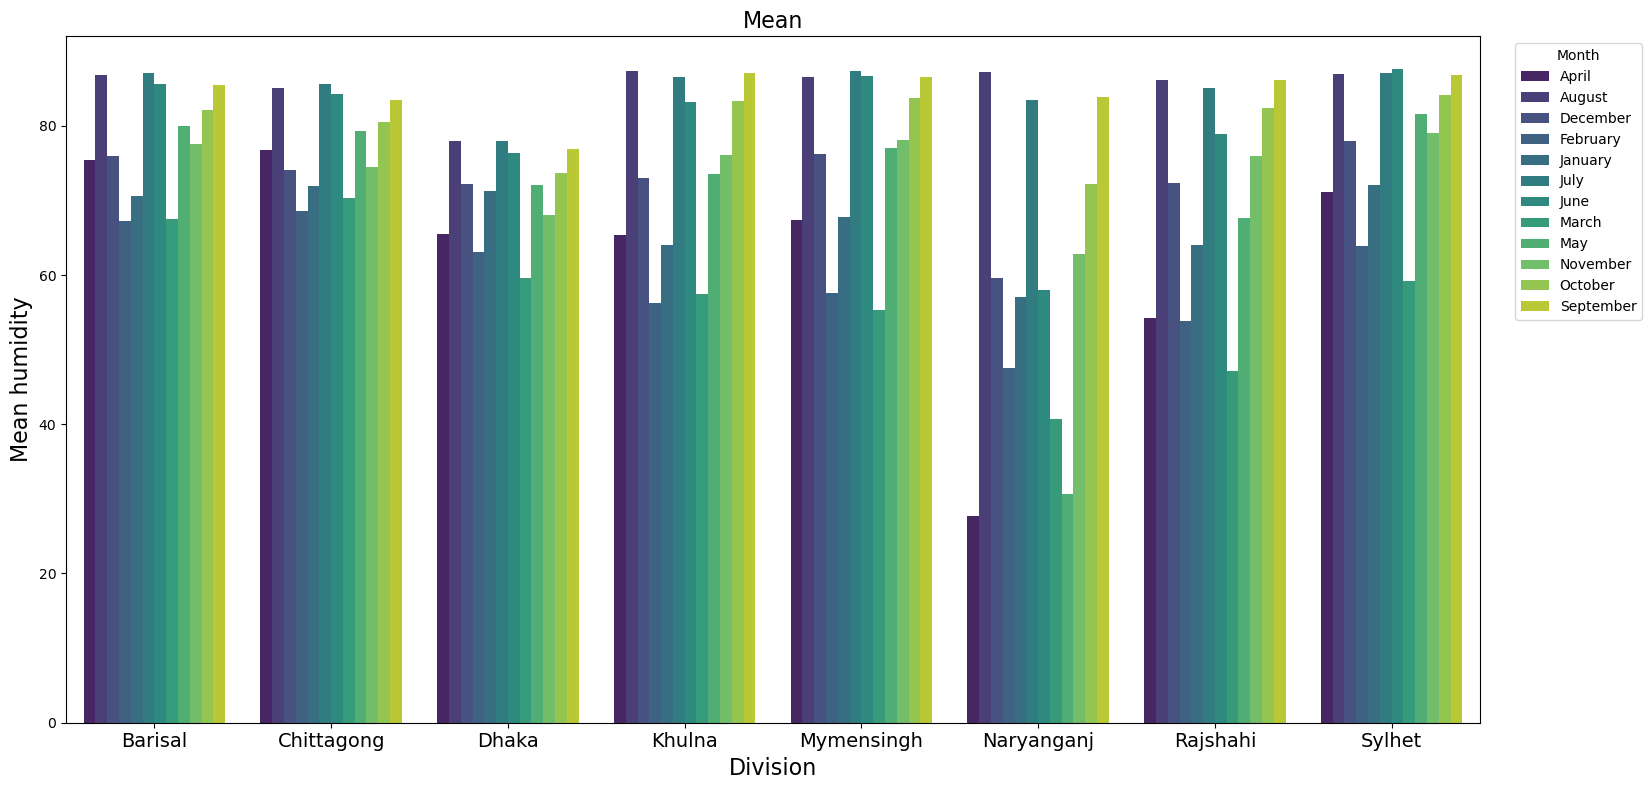

In [21]:
average_river_discharge_name_year=filtered_df.groupby(["Month", "Division"])[["humidity"]].aggregate('mean')
average_river_discharge_name_year = average_river_discharge_name_year.reset_index()

plt.figure(figsize=(15, 8))
sns.set_palette("viridis")

colors = sns.color_palette("viridis", n_colors=len(average_river_discharge_name_year["Month"].unique()))

sns.barplot(x="Division", y="humidity", hue="Month", data=average_river_discharge_name_year, palette=colors)
plt.xlabel("Division", fontsize=16)
plt.ylabel("Mean humidity", fontsize=16)
plt.title("Mean", fontsize=16)
#plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.legend(title="Month",  bbox_to_anchor=(1.02, 1), loc="upper left")

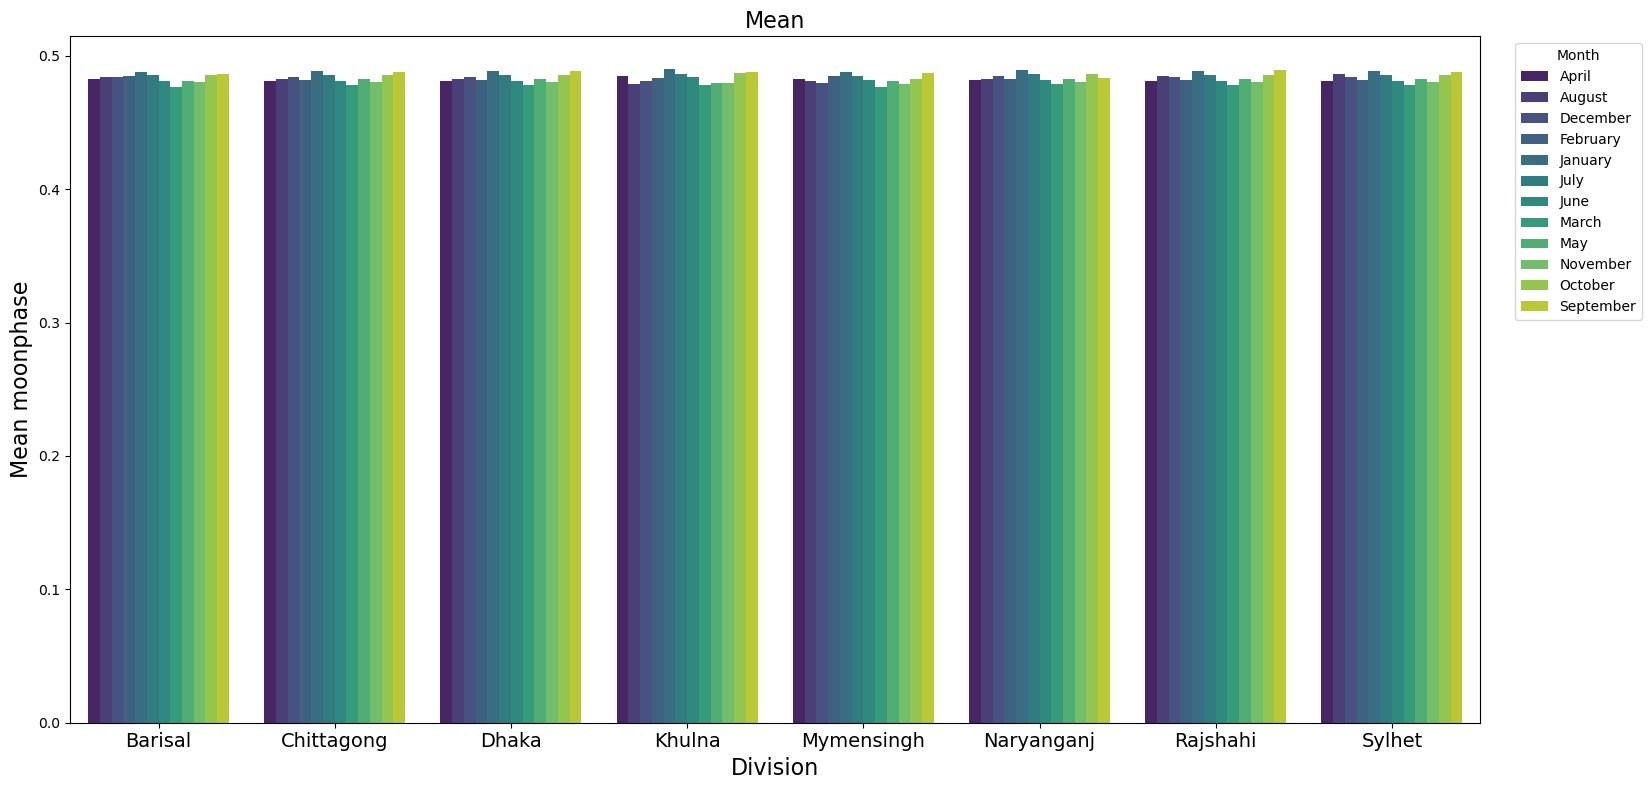

In [24]:
average_river_discharge_name_year=filtered_df.groupby(["Month", "Division"])[["moonphase"]].aggregate('mean')
average_river_discharge_name_year = average_river_discharge_name_year.reset_index()

plt.figure(figsize=(15, 8))
sns.set_palette("viridis")

colors = sns.color_palette("viridis", n_colors=len(average_river_discharge_name_year["Month"].unique()))

sns.barplot(x="Division", y="moonphase", hue="Month", data=average_river_discharge_name_year, palette=colors)
plt.xlabel("Division", fontsize=16)
plt.ylabel("Mean moonphase", fontsize=16)
plt.title("Mean", fontsize=16)
#plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.legend(title="Month",  bbox_to_anchor=(1.02, 1), loc="upper left")

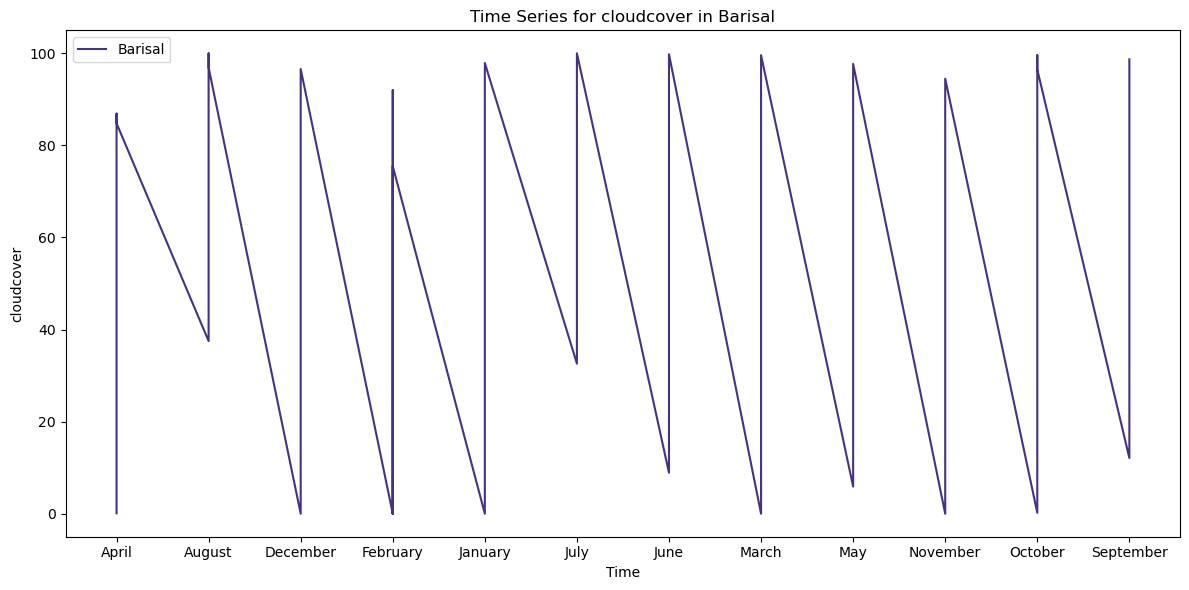

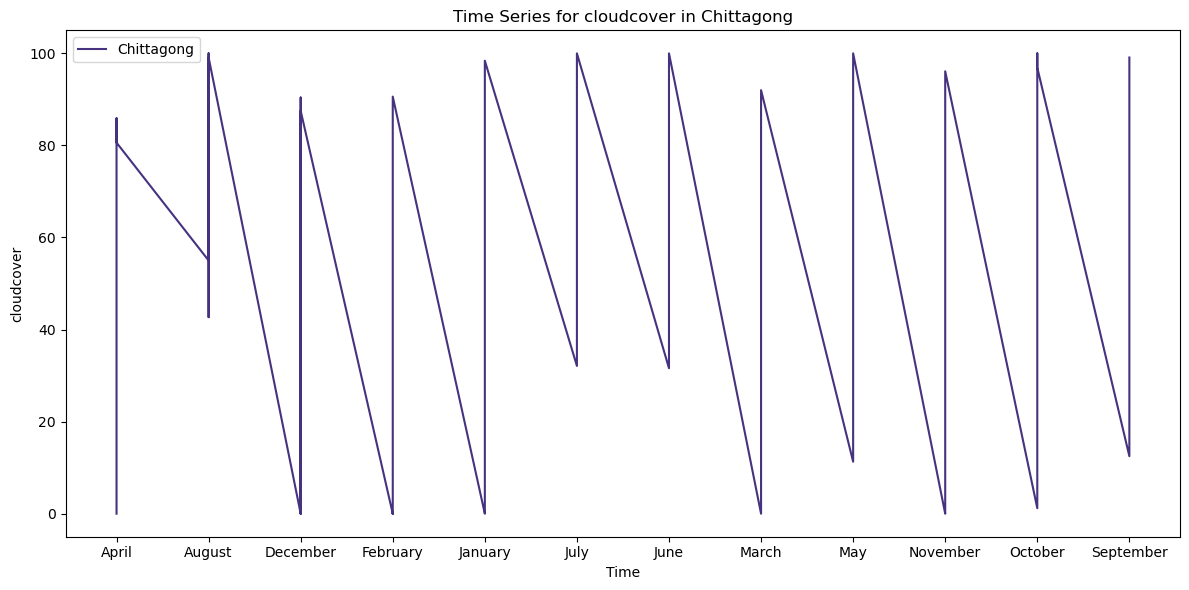

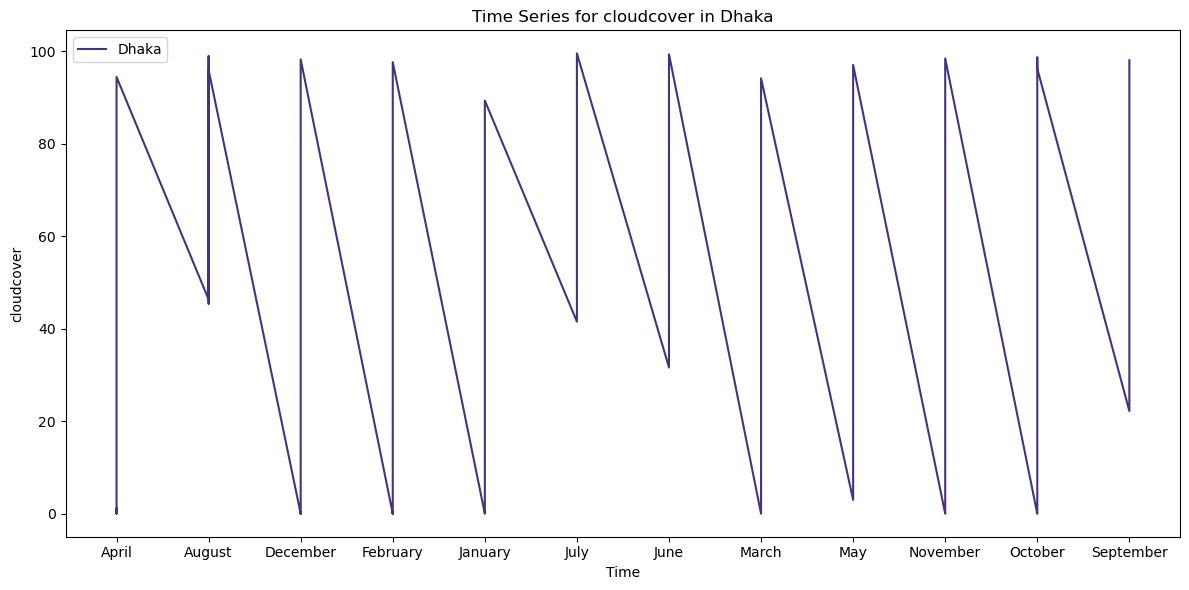

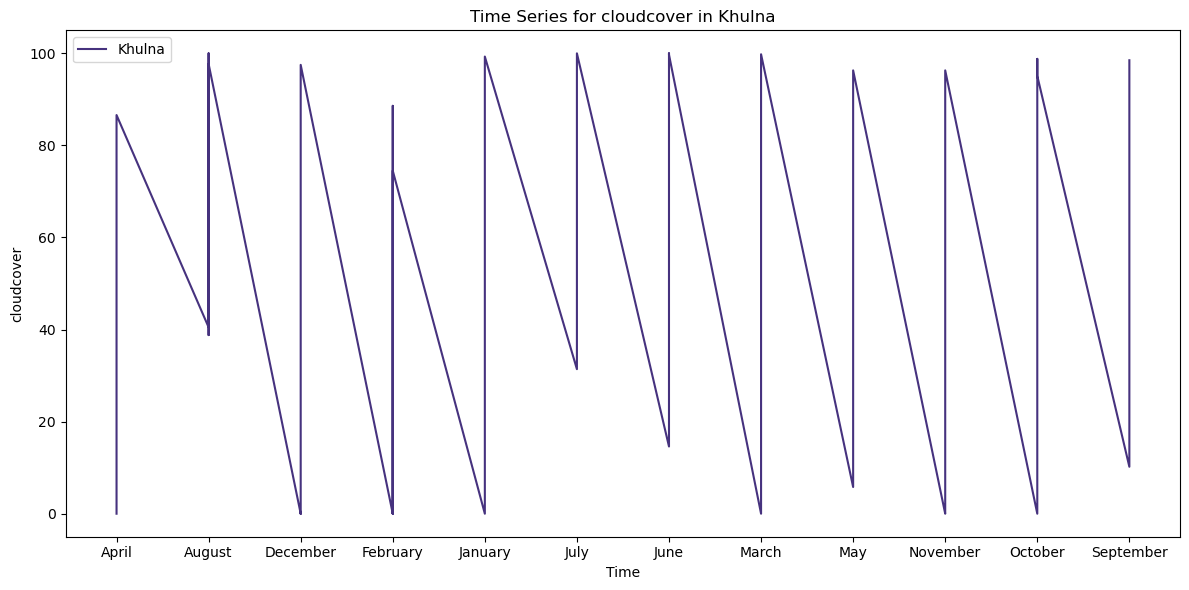

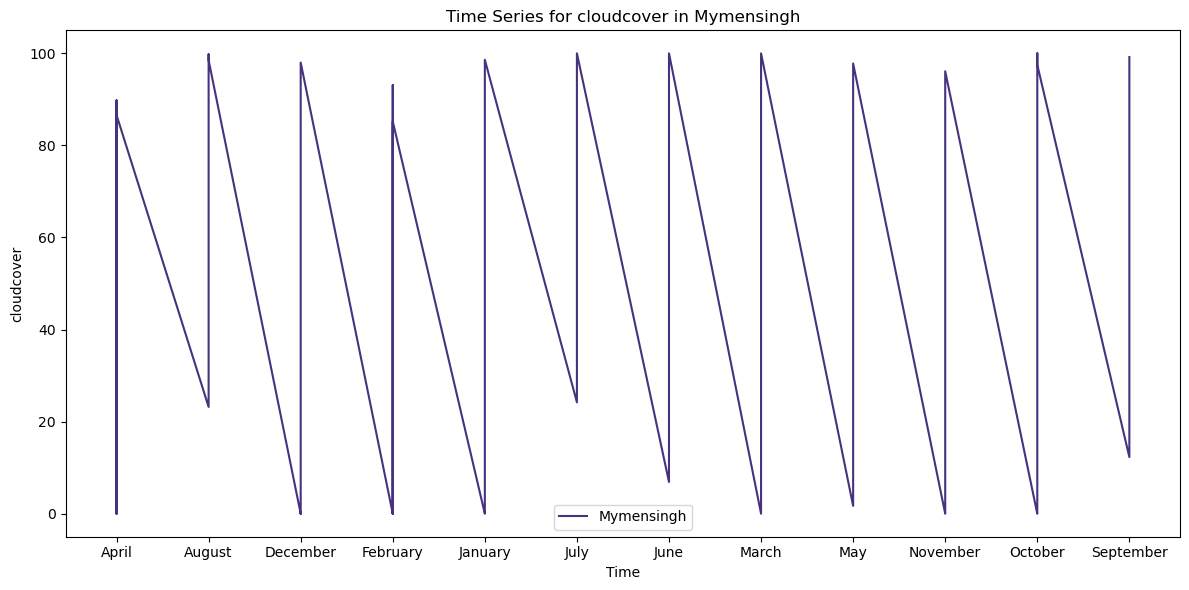

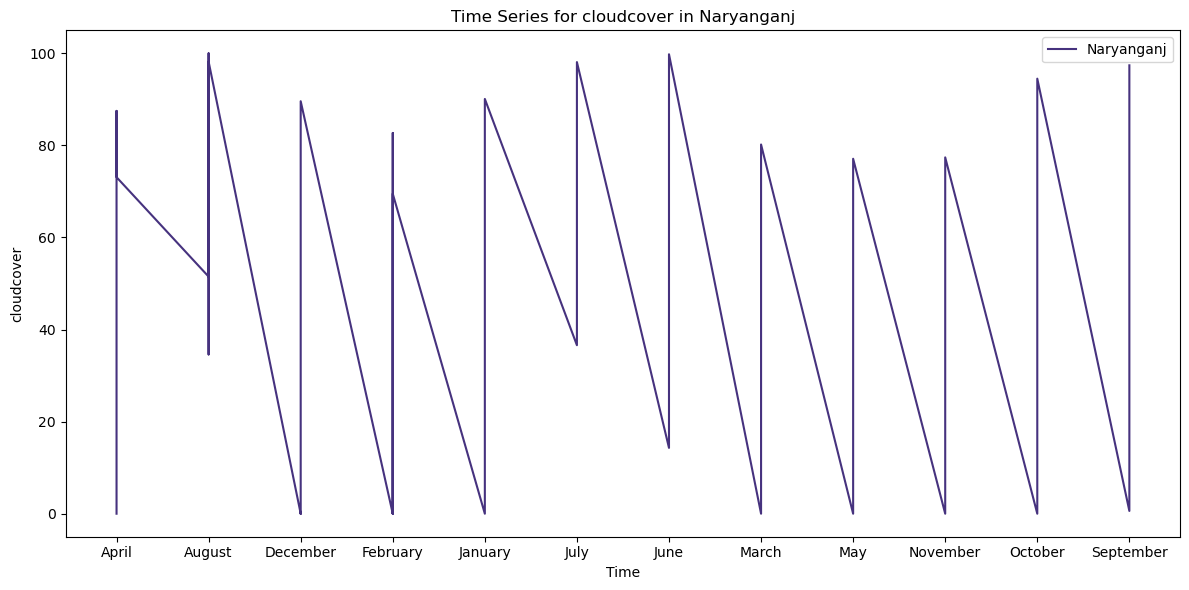

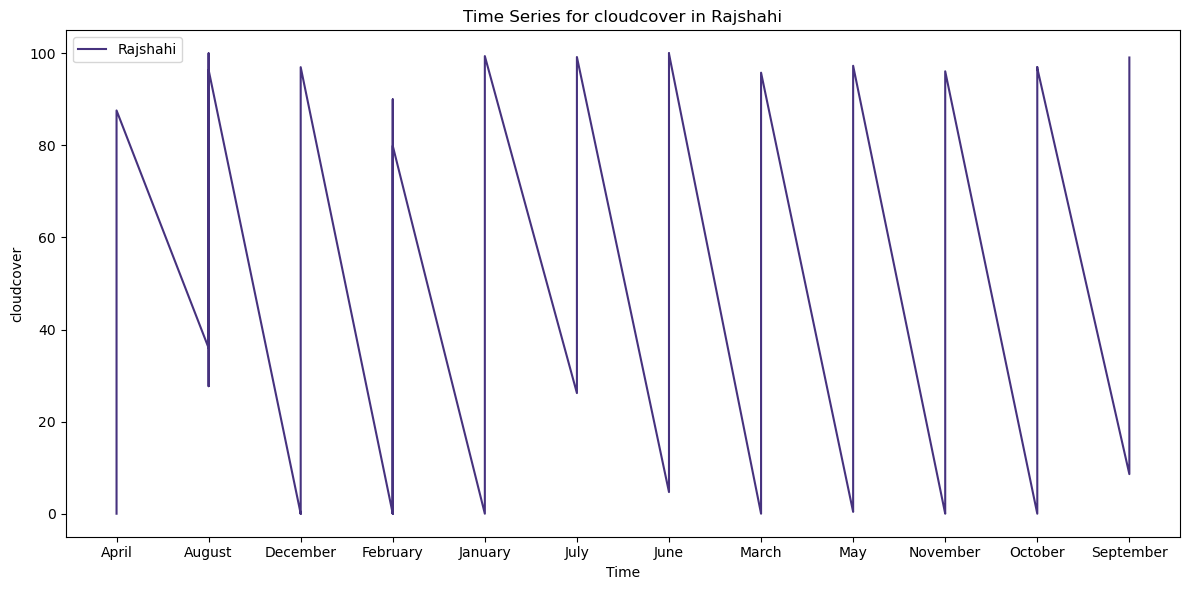

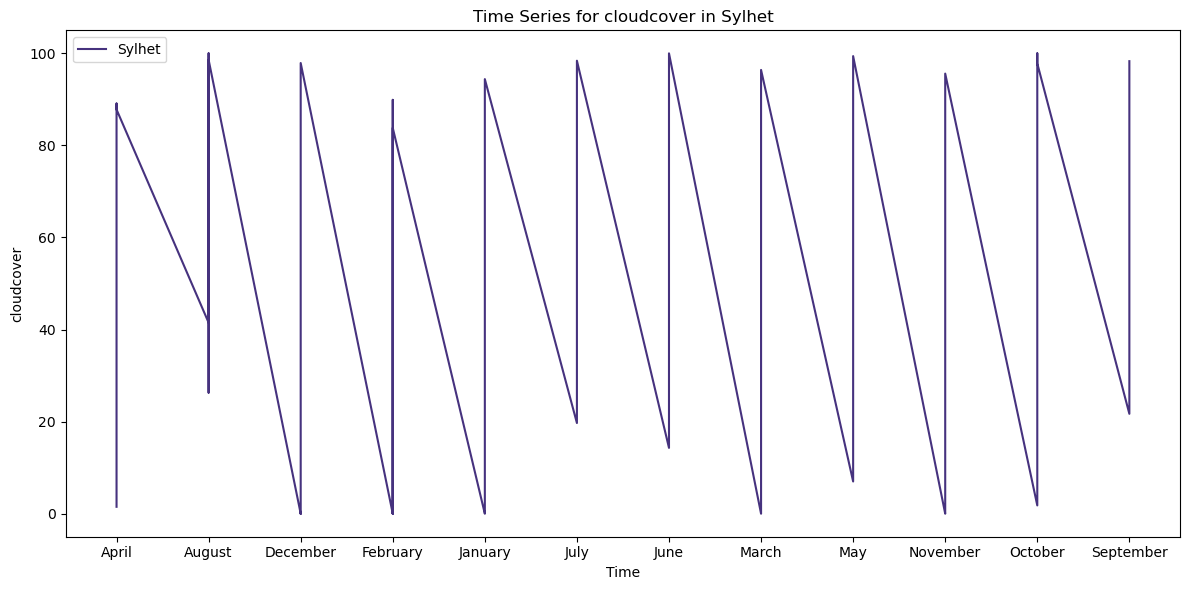

In [41]:
df = df.sort_values(by=['Division', 'Month'])
grouped = df.groupby('Division')

# Iterate through each group
for name, group_df in grouped:
    plt.figure(figsize=(12, 6))
    plt.plot(group_df['Month'].values, group_df['cloudcover'].values, label=name)
    plt.title(f'Time Series for cloudcover in {name}')
    plt.xlabel('Time')
    plt.ylabel('cloudcover')
    plt.legend()
    #plt.grid(True)
    plt.tight_layout()
    plt.show()

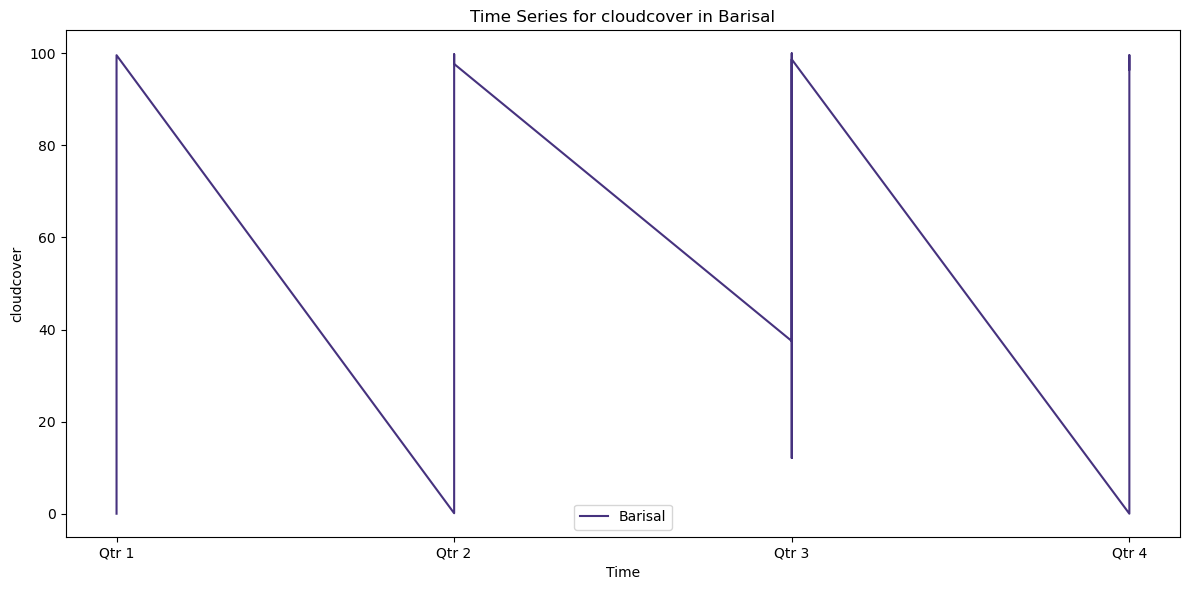

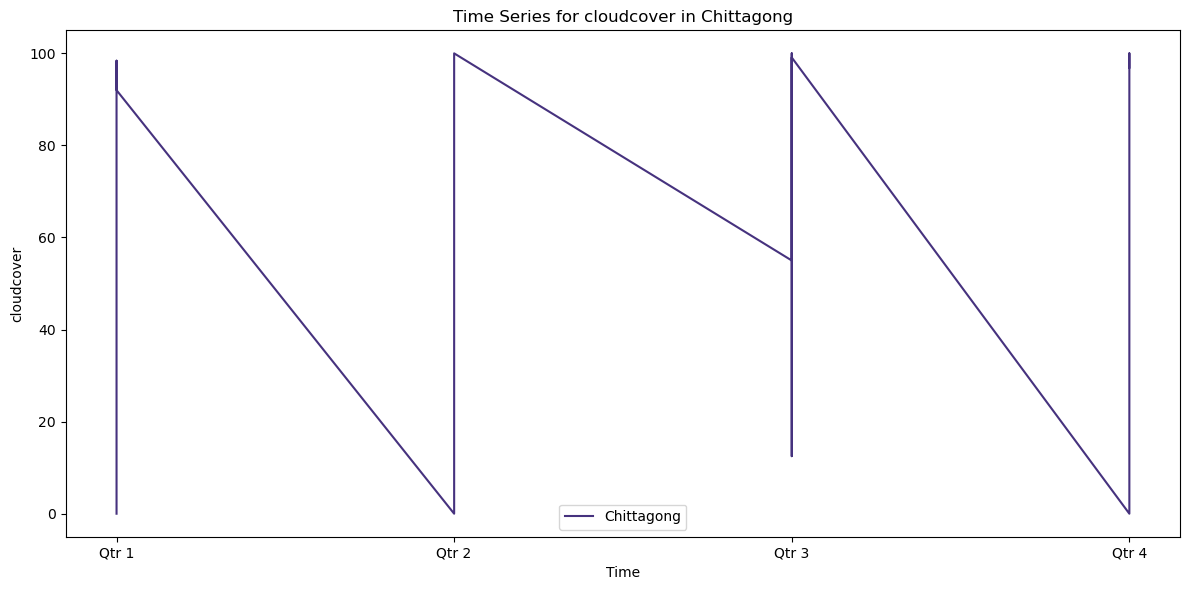

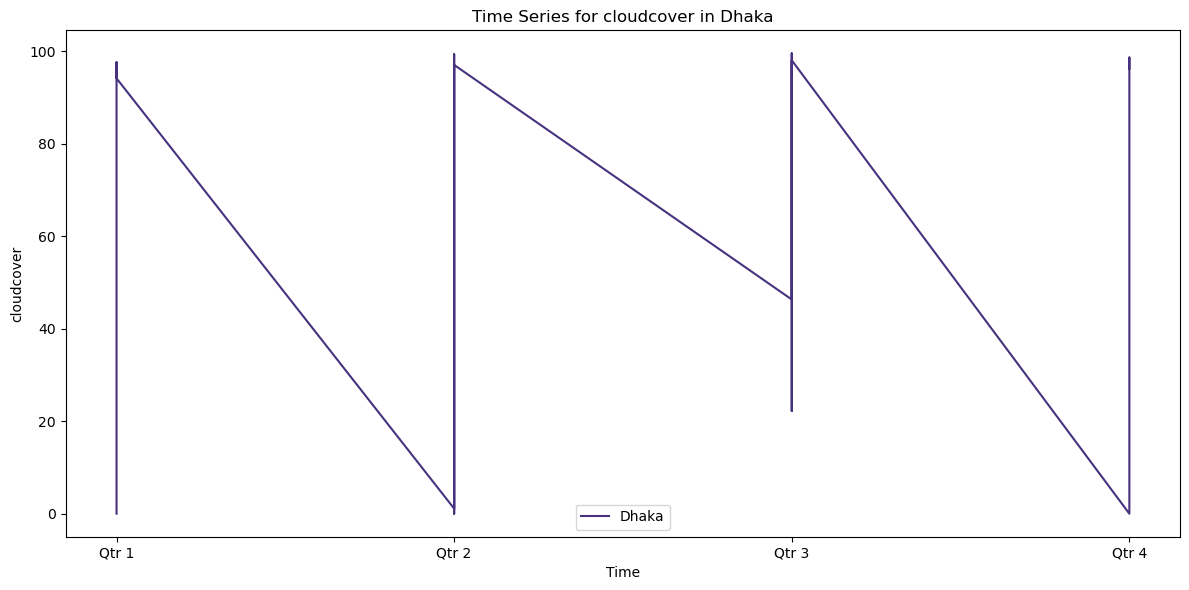

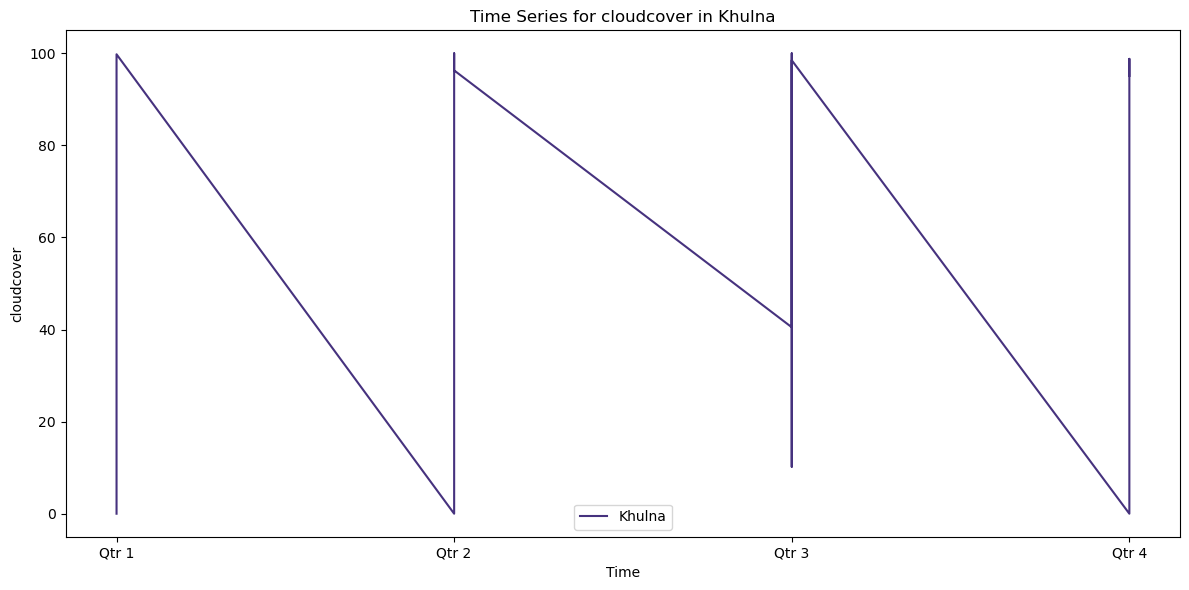

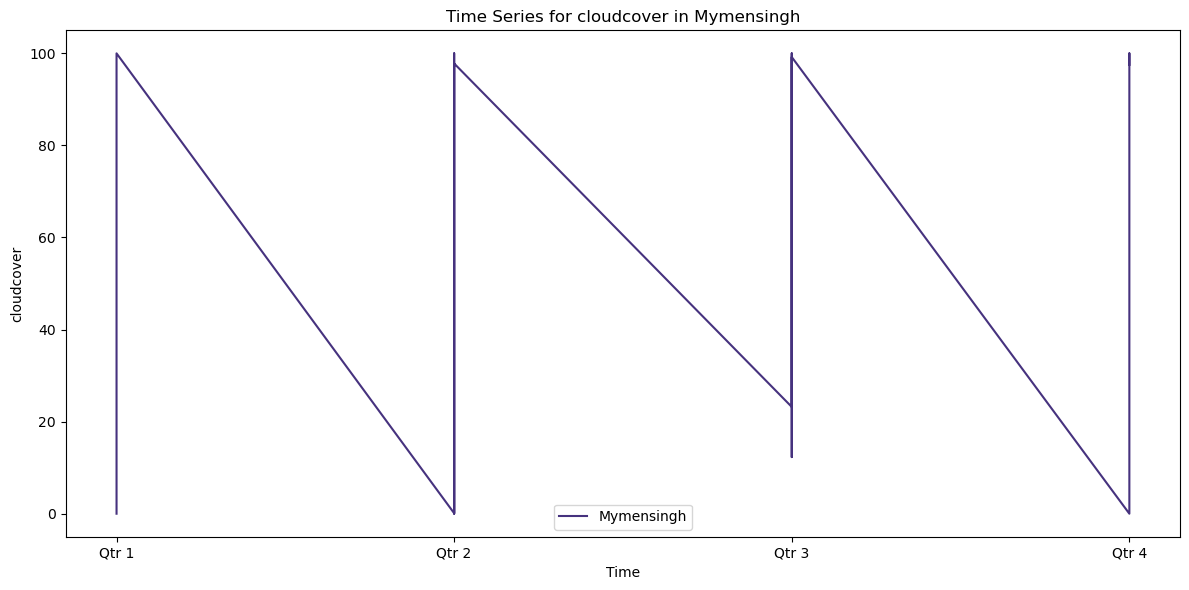

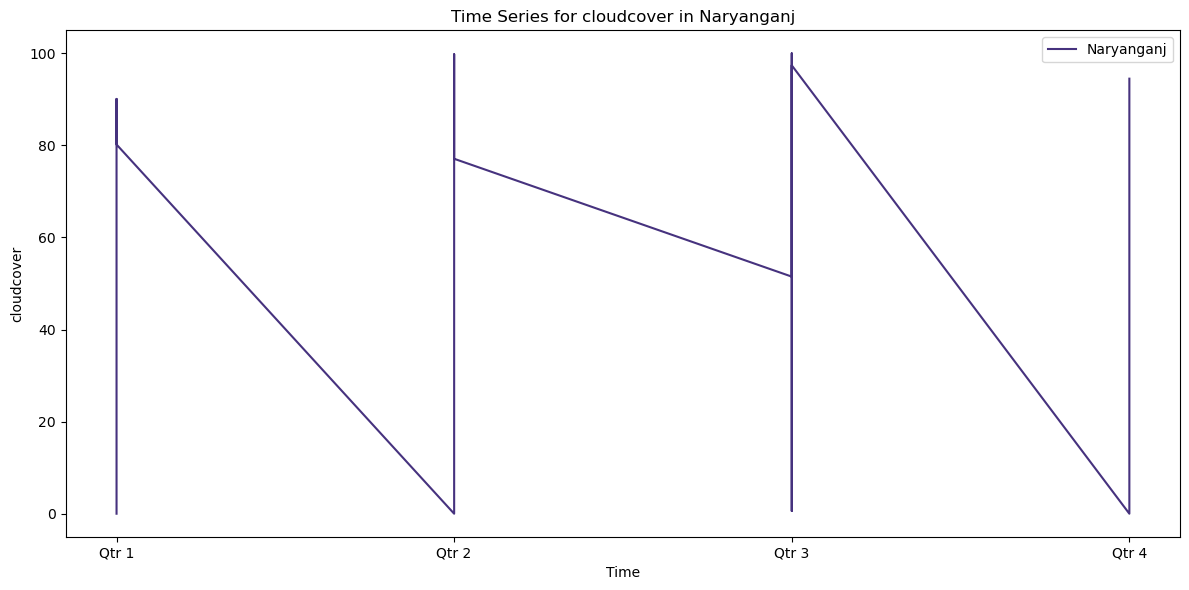

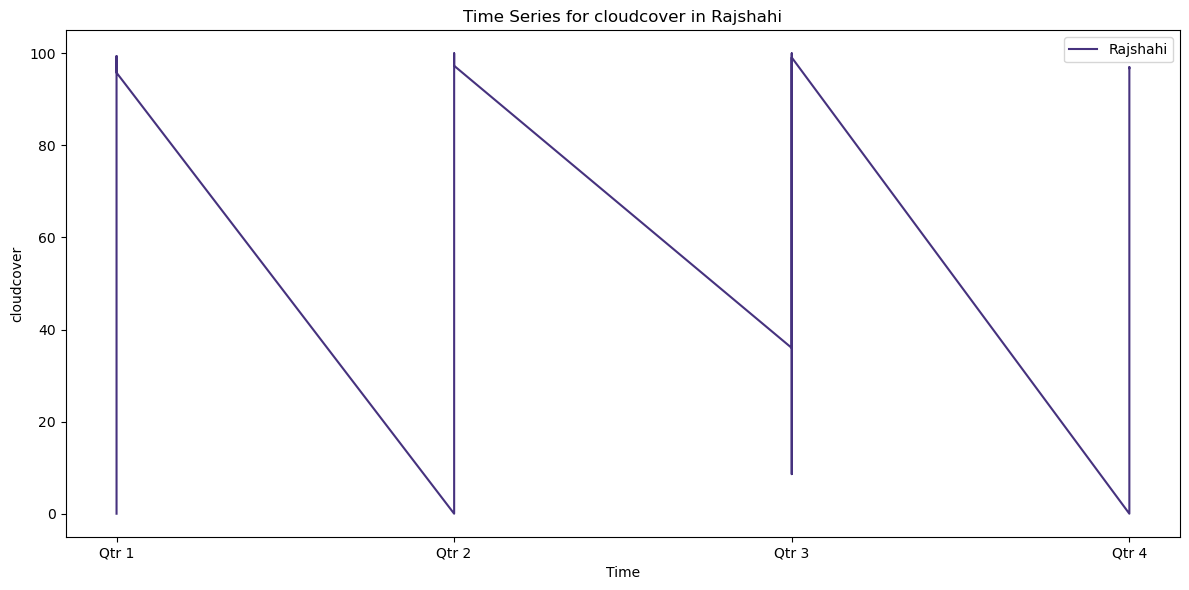

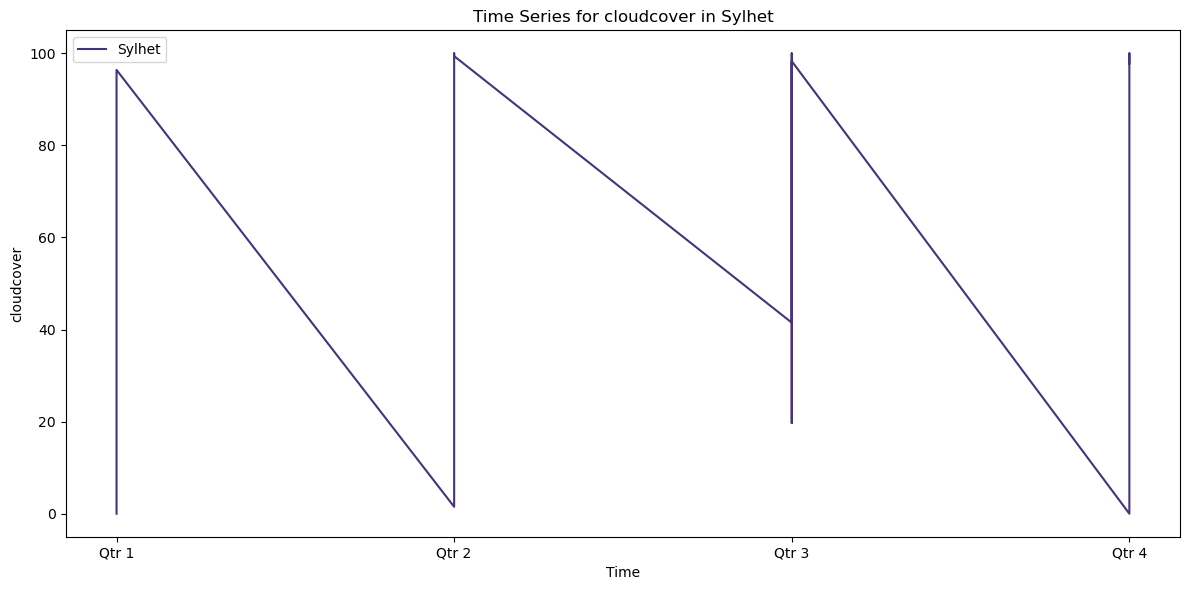

In [40]:
df = df.sort_values(by=['Division', 'Quarter'])
grouped = df.groupby('Division')

# Iterate through each group
for name, group_df in grouped:
    plt.figure(figsize=(12, 6))
    plt.plot(group_df['Quarter'].values, group_df['cloudcover'].values, label=name)
    plt.title(f'Time Series for cloudcover in {name}')
    plt.xlabel('Time')
    plt.ylabel('cloudcover')
    plt.legend()
    #plt.grid(True)
    plt.tight_layout()
    plt.show()

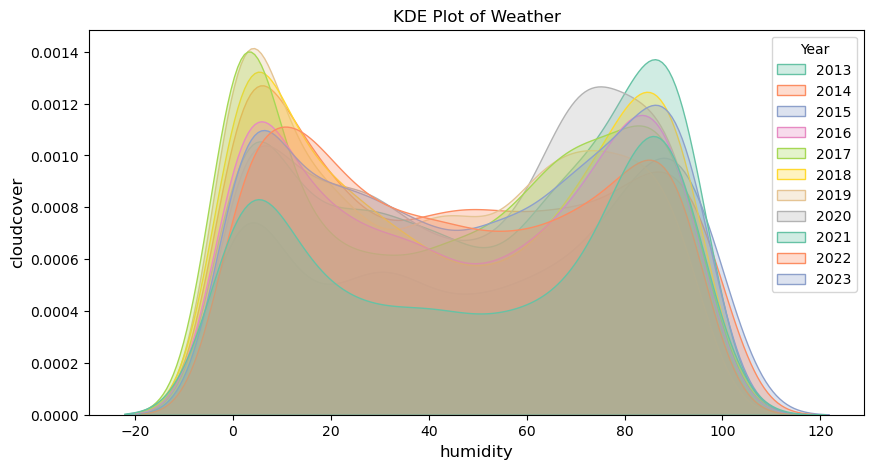

In [34]:
plt.figure(figsize = (10,5))
sns.kdeplot(data=df, x='cloudcover', alpha=0.3, shade = True,  hue='Year', palette='Set2')
plt.xlabel('humidity', fontsize=12)
plt.ylabel('cloudcover', fontsize=12)
plt.title('KDE Plot of Weather')
plt.show()

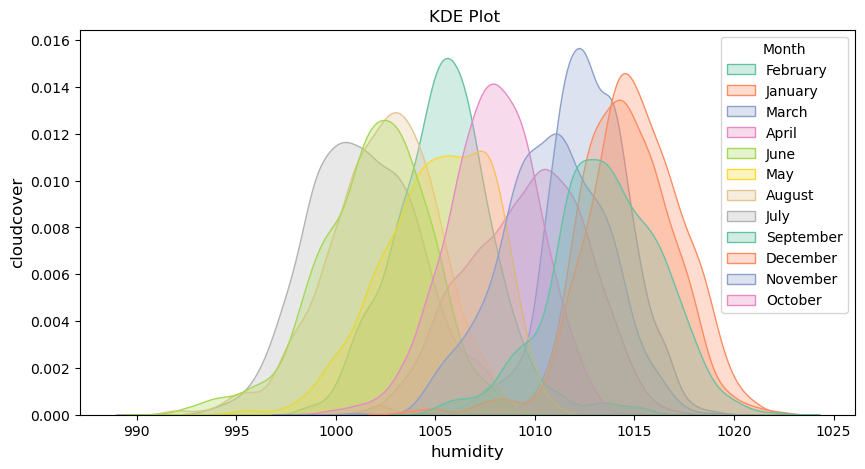

In [39]:
plt.figure(figsize = (10,5))
sns.kdeplot(data=df, x="sealevelpressure", alpha=0.3, shade = True,  hue='Month', palette='Set2')
plt.xlabel('humidity', fontsize=12)
plt.ylabel('cloudcover', fontsize=12)
plt.title('KDE Plot ')
plt.show()

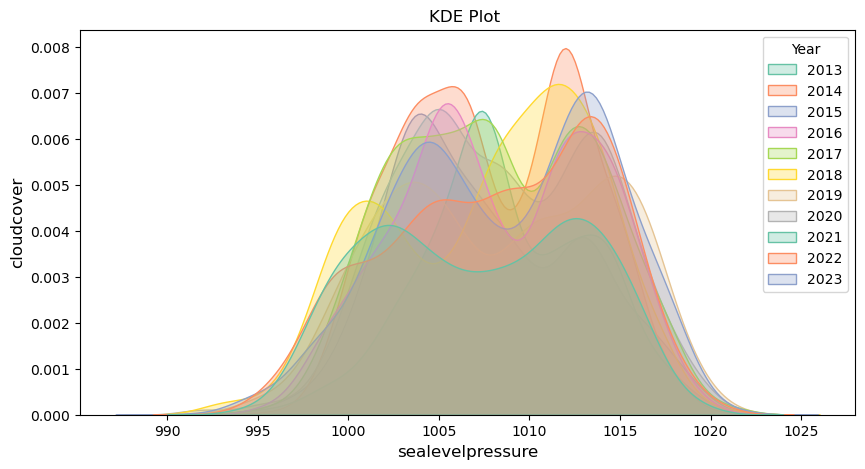

In [36]:
plt.figure(figsize = (10,5))
sns.kdeplot(data=df, x="sealevelpressure", alpha=0.3, shade = True,  hue='Year', palette='Set2')
plt.xlabel('sealevelpressure', fontsize=12)
plt.ylabel('cloudcover', fontsize=12)
plt.title('KDE Plot ')
plt.show()